In [1]:
import glob
import numpy as np

In [2]:
frds = glob.glob('output/ccx/*/*.frd')
dats = glob.glob('output/ccx/*/*.dat')

frds.sort()
dats.sort()

In [3]:
# dats = dats[1:]
# frds = frds[1:]

In [4]:
from djccx.read_dat import read_dat
from djccx.frd.readfrd import readfrd

In [5]:
t_l = 0.475 #  Espesor de la capa [mm]
t_n = 2.934
A_s = 0.283 # mm^2
r = 3*t_l/8 
d = (A_s - np.pi*r**2)/(2*r) # Area de la capa [mm^2]
params_composite ={
    "r"         :  r,
    "d"         :  d,
    "h"         :  t_l,
    "z0"        :  t_n/2,
    "density"   : 5,
}


params_ccx = {
    "epsilon" : 0.1,
    "x_fixed" : True
}
params = {
    "mesh" : params_composite,
    "ccx"  : params_ccx,
}

In [6]:
ni = [1,2,2,2,3,3]
ni = [2,2,2,2,3,3] # Consideramos Adouble

In [7]:


def compute_E_eff(iffiles,ni):
    print(iffiles)
    ancho = params_composite["z0"] + ni*params_composite["h"]
    largo = 10 

    A = ancho*largo
    
    ifrd = readfrd(iffiles)
    df = ifrd["data"]

    Ancho_FEM = df["z"].max() - df["z"].min()

    # print(10*"-")
    # print("Ancho FEM: ", Ancho_FEM)
    # print("Ancho A: ", ancho)

    Sapl = np.sum(df["F2"]*(df["y"] > df["y"].mean()))/A

    E_eff = Sapl / params["ccx"]["epsilon"]
    return E_eff

E_effs = [compute_E_eff(f,ini) for f,ini in zip(frds,ni)]
#E_effs = [compute_E_eff(f,ini) for f,ini in zip(frds[0:1],ni[0:1])]


output/ccx/Adouble/main.frd
output/ccx/B/main.frd
output/ccx/C/main.frd
output/ccx/D/main.frd
output/ccx/E/main.frd
output/ccx/F/main.frd


In [8]:
frds

['output/ccx/Adouble/main.frd',
 'output/ccx/B/main.frd',
 'output/ccx/C/main.frd',
 'output/ccx/D/main.frd',
 'output/ccx/E/main.frd',
 'output/ccx/F/main.frd']

In [9]:
E_effs

[np.float64(3039.3222261334154),
 np.float64(2048.431559055603),
 np.float64(2020.7657948571712),
 np.float64(2046.5517473339382),
 np.float64(1897.7112851091674),
 np.float64(1941.52623694025)]

In [10]:
from validation.FullExperimental import FullExperimental
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
df = FullExperimental()
df.rename(columns={"v [X,SX,Y,SY]": "delta"}, inplace=True)

# database
# layers = df["layers"].values
# layers[0] = ["Y","Y"]
# df["layers"] = layers


df.round(3)

Et [GPa]           % e        St [MPa]         Eb [GPa]        t [mm]  \
         mean    std   mean    std     mean     std     mean    std   mean   
Name                                                                         
TFP1    2.886  0.227  0.123  0.010  279.103  14.338   13.201  0.631  5.267   
TFP2    2.259  0.066  0.088  0.003  153.360   0.473    9.870  0.780  4.700   
TFP3    2.000  0.004  0.087  0.002  137.113   4.997    9.222  0.496  4.833   
TFP4    2.451  0.114  0.095  0.005  184.397   1.357   10.182  0.771  4.700   
TFP5    1.627  0.120  0.090  0.014   99.990   9.790    6.143  0.162  5.700   
TFP6    1.740  0.068  0.089  0.010  104.513   7.709    7.798  0.334  5.600   

             b [mm]        Sb [MPa]               layers     Vc  
        std    mean    std     mean     std                      
Name                                                             
TFP1  0.058  25.600  0.100  134.997  18.943          [Y]  0.178  
TFP2  0.000  25.567  0.058  117.430  15.760       [Y, X]  0.164  
TFP3  0.058  25.400  0.173  128.053   5.338      [Y, SX]  0.135  
TFP4  0.000  25.667  0.153  141.703   7.525      [Y, SY]  0.144  
TFP5  0.000  25.167  0.153  107.433   3.903  [Y, SX, SY]  0.146  
TFP6  0.000  25.033  0.635  114.307  11.801   [Y, X, SY]  0.180

In [12]:
E_effs = np.array(E_effs)*1e-3
Et_exp = df["Et [GPa]"]["mean"].values

print(E_effs)
print(Et_exp)

[3.03932223 2.04843156 2.02076579 2.04655175 1.89771129 1.94152624]
[2.88550922 2.25850254 2.00043656 2.45136175 1.62658228 1.73986993]


In [13]:
error_rel = np.abs(E_effs - Et_exp)/Et_exp

In [14]:
names = df.index.values

In [18]:
import pandas as pd

df_analitico_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\01_traccion\01_optim\df_pred.csv"
df_analitico_path = "../../01_metodo/01_traccion/01_optim/df_pred.csv"
df_analitico = pd.read_csv(df_analitico_path, index_col=0)
df_analitico

,E pred [GPa],E exp [GPa],E e rel [%]
Name,,,
TFP1,3.04,2.89,5.34
TFP2,2.03,2.26,10.05
TFP3,2.00,2.00,0.08
TFP4,2.03,2.45,17.29
TFP5,1.87,1.63,15.23
TFP6,1.90,1.74,9.13


In [19]:
Et_analitico = df_analitico["E pred [GPa]"].values

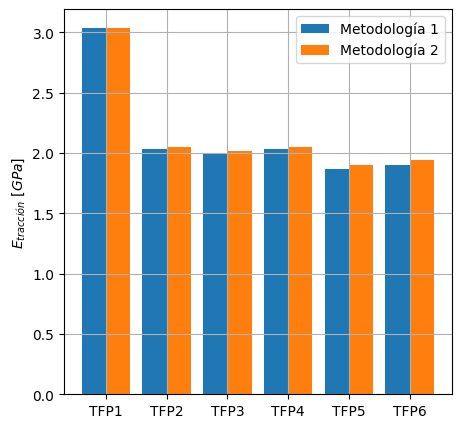

In [20]:


# bar compare 
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
width = 0.4
x = np.arange(len(E_effs))
# ax.bar(x - 0.95*width, Et_exp, width, label='Experimental')
ax.bar(x - 0.2, Et_analitico, width, label='Metodología 1')

ax.bar(x + 0.2, E_effs, width, label='Metodología 2')
#Et_analitico
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.legend()
plt.ylabel(r"$E_{tracción} \ [GPa]$")
plt.grid()

Text(0, 0.5, '$\\varepsilon_{rel} \\ [\\%]$')

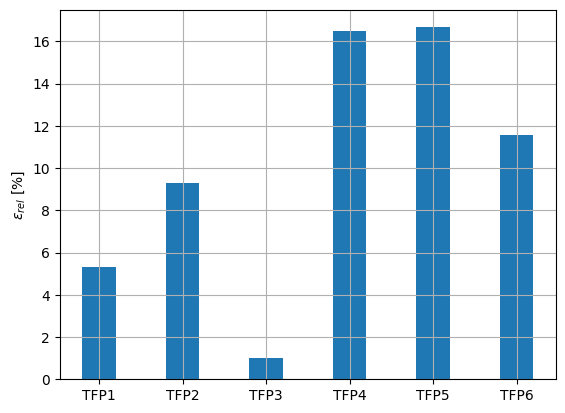

In [21]:
# plot bar error
fig, ax = plt.subplots()

ax.bar(x, 100*error_rel, width, label='Error')

ax.set_xticks(x);
ax.set_xticklabels(names)
plt.grid()
plt.ylabel(r"$\varepsilon_{rel} \ [\%]$")

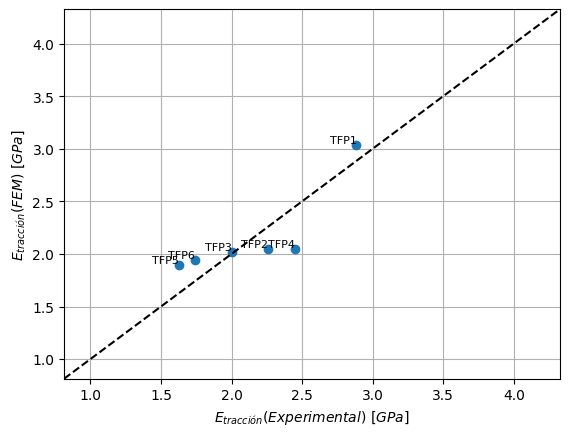

In [22]:
# vs 
fig, ax = plt.subplots()
ax.plot(Et_exp, E_effs, "o")
ax.plot([0.5*Et_exp.min(), 1.5*Et_exp.max()], 
        [0.5*Et_exp.min(), 1.5*Et_exp.max()], "k--")
ax.set_xlabel(r"$E_{tracción} (Experimental) \ [GPa]$")
ax.set_ylabel(r"$E_{tracción} (FEM) \ [GPa]$")

plt.grid()
plt.xlim(0.5*Et_exp.min(), 1.5*Et_exp.max())
plt.ylim(0.5*Et_exp.min(), 1.5*Et_exp.max())

# text 
for i, txt in enumerate(names):
    ax.annotate(txt, (Et_exp[i], E_effs[i]), fontsize=8, ha='right', va='bottom')

([<matplotlib.axis.XTick at 0x7f4ce072e890>,
 [Text(0, 0, 'TFP1'),
  Text(1, 0, 'TFP2'),
  Text(2, 0, 'TFP3'),
  Text(3, 0, 'TFP4'),
  Text(4, 0, 'TFP5'),
  Text(5, 0, 'TFP6')])

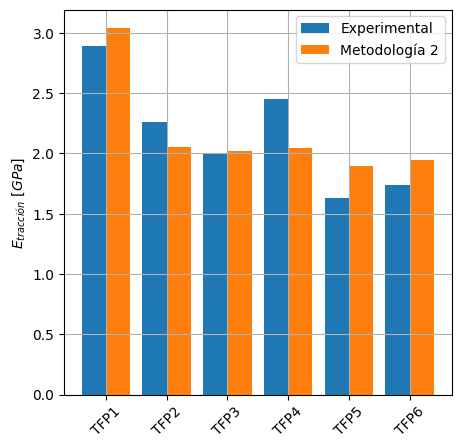

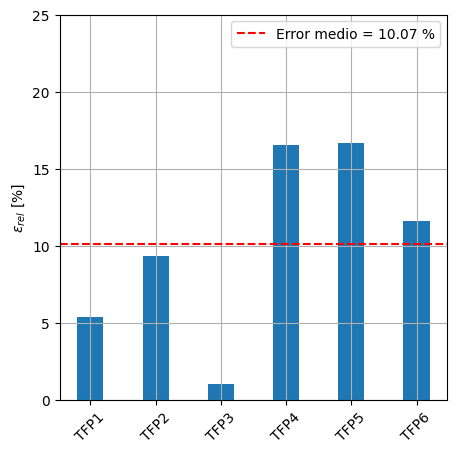

In [23]:
# plot bar 
fig = plt.figure()
fig.set_size_inches(5, 5)
x = np.arange(len(E_effs))
plt.bar(x - 0.2, Et_exp, width, label='Experimental')
plt.bar(x + 0.2, E_effs, width, label='Metodología 2')
plt.ylabel(r"$E_{tracción} \ [GPa]$")
plt.legend()
plt.xticks(x, names, rotation=45)

plt.grid()

fig = plt.figure()
fig.set_size_inches(5, 5)
error_abs = np.abs(E_effs - Et_exp)
error_rel = 100*np.abs(E_effs - Et_exp)/Et_exp
plt.bar(x, error_rel, width)
error_mean = np.mean(error_rel)
plt.axhline(error_mean, color="red", linestyle="--", label="Error medio = %.2f" % error_mean + " %")
plt.legend()
plt.grid()
plt.ylim(0,25)
plt.ylabel(r"$\varepsilon_{rel} \ [\%]$")
plt.xticks(x, names, rotation=45)

In [24]:
df_results = pd.DataFrame({
    "labels": names,
    "E_effs": E_effs,
    "Et_exp": Et_exp,
    "error_abs": error_abs,
    "error_rel": error_rel,
})

In [25]:
df_results.round(3)

,labels,E_effs,Et_exp,error_abs,error_rel
0,TFP1,3.039,2.886,0.154,5.331
1,TFP2,2.048,2.259,0.210,9.301
2,TFP3,2.021,2.000,0.020,1.016
3,TFP4,2.047,2.451,0.405,16.514
4,TFP5,1.898,1.627,0.271,16.669
5,TFP6,1.942,1.740,0.202,11.590


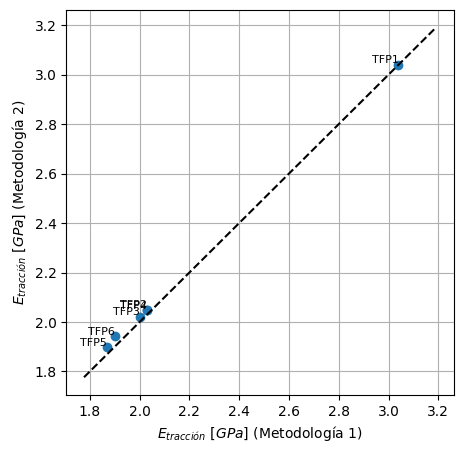

In [26]:
# vs 
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.plot(Et_analitico,E_effs, "o")
ax.plot([0.95*Et_analitico.min(), 1.05*Et_analitico.max()], 
        [0.95*Et_analitico.min(), 1.05*Et_analitico.max()], "k--")
ax.set_xlabel(r"$E_{tracción} \ [GPa]$ (Metodología 1)")
ax.set_ylabel(r"$E_{tracción} \ [GPa]$ (Metodología 2)")

plt.grid()

#text 
for i, txt in enumerate(names):
    ax.annotate(txt, (Et_analitico[i], E_effs[i]), fontsize=8, ha='right', va='bottom')

In [27]:
error= np.abs(E_effs - Et_analitico)/E_effs
error_rel = np.abs(E_effs - Et_analitico)/Et_analitico

df_results = pd.DataFrame({
    "E [GPa] (Metodología 1)": Et_analitico,
    "E [GPa] (Metodología 2)": E_effs,
    "error_rel [%]": error_rel*100,
    "error [%]": error*100
}, index=names)

In [28]:
df_results.round(3)

,E [GPa] (Metodología 1),E [GPa] (Metodología 2),error_rel [%],error [%]
TFP1,3.04,3.039,0.022,0.022
TFP2,2.03,2.048,0.908,0.900
TFP3,2.00,2.021,1.038,1.028
TFP4,2.03,2.047,0.815,0.809
TFP5,1.87,1.898,1.482,1.460
TFP6,1.90,1.942,2.186,2.139
